#  Melbourne Housing Prices 

### Main Objective: To create a model able to predict the Housing Prices in Melbourne.
 1) Fetch the Housing Prices Dataset <br>
 2) Data cleaning i.e A) Remove insignificant features , B) Deal with N.A values and drop the rest unimportant data records.<br>
 3) Train Test Split<br>
 4) Determine the best fit for our model<br>
 5) Predictions <br>


In [4]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Suppress Systems warnings
#Warnings.filterwarnings('ignore')

## Load Melbourne Dataset

In [5]:
dataset = pd.read_csv('./Melbourne_Housing/Data/Melbourne_housing_FULL.csv')

### Dataset before Cleaning

In [7]:
#View the entire Dataset
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


<br><br><br>

In [8]:
#View the Dataset shape
dataset.shape

(34857, 21)


The dataset has <b>34857 records and 21 Features. </b> Now there are some features that doesnot have much effect to our price prediction model. Mreover this dataset also include <b>N.A values</b> which need to be cleaned. 


## DATA CLEANING


In [119]:
# 1) Listing the useful Features(Columns)
cols_to_use = ['Suburb' , 'Rooms' , 'Type' , 'Method' , 'SellerG' , 'Regionname' , 'Propertycount' , 'Distance' , 
               'CouncilArea' , 'Bedroom2' ,'Bathroom' , 'Car' , 'Landsize' , 'BuildingArea' , 'Price' ]

# 2) Filter out other insignificant Features
dataset = dataset[cols_to_use]
dataset.shape

(34857, 15)

Thus, we reduced the number to columns to <b>15 significant features</b> from overall 21 features.

In [120]:
# 3) Check for N.A values in the dataset
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

Feeding the N.A values in the dataset with 0 or mean values where ever needed and dropping the rest columns.

In [108]:
# Fill with Zero
cols_to_fill_zero = ['Propertycount' , 'Distance' , 'Bedroom2' , 'Bathroom' , 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

# Fill with mean
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

# Drop the remaining
dataset.dropna(inplace=True)



### Dataset after Data Filtering

In [109]:
# Clean N.A values
dataset.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

Thus we cleaned all the N.A data records.

## One Hot Encoding

In [36]:
dataset = pd.get_dummies(dataset , drop_first = True)
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
X = dataset.drop('Price' , axis=1)
Y = dataset['Price']

<br><br><br><br><br><br>
## Train-Test Split

In [44]:
from sklearn.model_selection import train_test_split

train_X , test_X , train_Y , test_Y = train_test_split(X , Y, test_size = 0.3 , random_state= 2 )

## Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(train_X ,train_Y)
lr_r2 = lr.score(test_X , test_Y)
print('R2 for Linear Regression : ' , lr_r2)

R2 for Linear Regression :  0.1385368316163994


## Lasso Regression

In [67]:
from sklearn.linear_model import Lasso
lassoR = Lasso(alpha= 50 , max_iter= 1000 , tol=0.1)
lassoR.fit(train_X ,train_Y)
lasso_r2 = lassoR.score(test_X , test_Y)
print('R2 for Lasso Regression : ' , lasso_r2)


R2 for Lasso Regression :  0.6636280170612746


## Ridge Regression

In [68]:
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha= 50 , max_iter= 1000 , tol = 0.1)
ridgeR.fit(train_X ,train_Y)
ridge_r2 = ridgeR.score(test_X , test_Y)
print('R2 for Ridge Regression : ' , ridge_r2)

R2 for Ridge Regression :  0.6670848945194958


In [72]:
methods_labels = ['Linear Regression' , 'Lasso Regression' ,'Ridge Regression']
r2_values = [ lr_r2 , lasso_r2, ridge_r2]
R2_results = pd.Series(r2_values , index= methods_labels).to_frame()
R2_results.rename(columns = {0: 'R2 Score'} , inplace=1)
R2_results

,R2 Score
Linear Regression,0.138537
Lasso Regression,0.663628
Ridge Regression,0.667085


<br><br><br><br><br>
On comparing Linear, Lasso and Ridge Regression we got the best R2 score for Ridge Regression thus, we would be using <b>Ridge Regression</b> for our price prediction model.
<br>
Now we need to <b>optimize</b> the solution thus using RidgeCV which will find the <b>optimal alpha value</b> along with  <b>Cross Validation.</b>

In [81]:
from sklearn.linear_model import RidgeCV
alphas = [0.005 ,0.05 , 0.1 ,0.3 , 1 ,5 , 10 ,15 , 30 ,80 ]
ridgeCV = RidgeCV(alphas = alphas , cv =4).fit(train_X ,train_Y)
ridgeCV_r2 = ridgeCV.score(test_X , test_Y)


In [87]:
print('\nRidge Regression ')
print('Optimal Alpha :' , ridgeCV.alpha_ , ' , R2 Score :', ridgeCV_r2)


Ridge Regression 
Optimal Alpha : 5.0  , R2 Score : 0.6743855819360092


In [89]:
#Predicted value for RidgeCV Regression for alpha = 5.0
predicted_ridgeCV_X_test = ridgeCV.predict(test_X)

#Predicted value for Linear Regression
predicted_LR_X_test = lr.predict(test_X)

<br><br>(Graph continued on next page)
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
### Actual Values VS Predicted Values

[Text(0.5, 0, 'Actual Price'),
 Text(0, 0.5, 'Predicted Value'),
 (0.0, 8000000.0),
 (0.0, 8000000.0),
 Text(0.5, 1.0, 'Housing Price Predictions Model')]

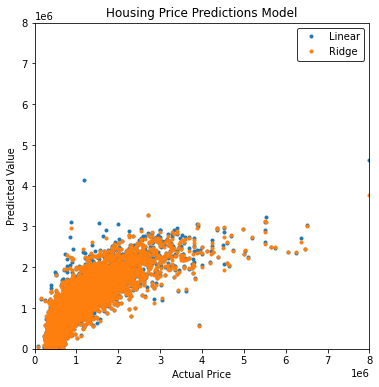

In [97]:
# Graph Actual Values VS Predicted Values

f =plt.figure(figsize= (6,6))
ax = plt.axes()
labels = ['Linear', 'Ridge']
predicted_values = [predicted_LR_X_test , predicted_ridgeCV_X_test]
for pred_val , lab in zip(predicted_values , labels):
    ax.plot(test_Y , pred_val , marker='o' , ls='' , ms=3.0 , label= lab)

leg = plt.legend(frameon =True)
leg.get_frame().set_edgecolor('black') 
leg.get_frame().set_linewidth(1.0)
lim = (0 , test_Y.max())
ax.set(xlabel = 'Actual Price', ylabel='Predicted Value' , xlim =lim , ylim =lim , title= 'Housing Price Predictions Model')

## Conclusion

Thus, I got best R2 score for <b>Ridge Regression</b> among other models for my <b>Melbourne Housing Prediction Model.</b> Moreover I to optimize my predictions I used RidgeCV that calculated the optimal alpha(alpha = 5.0) for this particular case along with Cross Validation. Currently my <b>R2 score is 0.6743855819360092</b>(i.e. 67.44% accuracy).<br><br>
<b>FLAWS : </b> For now I have just filled the Null values with 0 or their mean values but need to <b>find the most accurate assumrd value.</b> Also I have </b>not considered Feature Transformation.</b><br>
Thus, for increasing my accuracy I need to overcome my flaws and also test other predictive models <b>ANOVA, Logistic Regression, Decision Trees, Neural Networks.</b>